In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
#from matplotlib.colors import LogNormZ
from matplotlib import rc
from numpy import inf
from matplotlib import gridspec

import os

rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False})

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import yaml
#import mplhep as hep
#hep.set_style(hep.style.CMS)
#hep.set_style("CMS") 
import sys
sys.path.append('../')
from process_functions import averages_in_qperp_bins

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
bins = {}
dologx = [False,False,False,True]
dology = [True,False,True,True]

N_Bins = 10
q_max = 10.0
q_perp_bins = np.logspace(np.log10(1),np.log10(q_max),N_Bins+1)
q_perp_bins[0] = 0
#q_perp_bins = np.insert(q_perp_bins,0,0)
q_perp_bins = [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8., 10.]
N_Bins = len(q_perp_bins)

bins[0] = q_perp_bins
#jet pt
bins[1] = np.logspace(np.log10(10),np.log10(100),100)

phi_bins = np.linspace(0,np.pi,10)
bins[2] = phi_bins

bins[3] = q_perp_bins
bins[4] = q_perp_bins
bins[5] = q_perp_bins
bins[6] = q_perp_bins
bins[7] = q_perp_bins


In [3]:
print(q_perp_bins)

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0]


In [4]:
print(bins)

{0: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0], 1: array([ 10.        ,  10.23531022,  10.47615753,  10.72267222,
        10.97498765,  11.23324033,  11.49756995,  11.76811952,
        12.0450354 ,  12.32846739,  12.61856883,  12.91549665,
        13.21941148,  13.53047775,  13.84886371,  14.17474163,
        14.50828778,  14.84968262,  15.19911083,  15.55676144,
        15.92282793,  16.29750835,  16.68100537,  17.07352647,
        17.475284  ,  17.88649529,  18.3073828 ,  18.73817423,
        19.17910262,  19.6304065 ,  20.09233003,  20.56512308,
        21.04904145,  21.5443469 ,  22.0513074 ,  22.5701972 ,
        23.101297  ,  23.64489413,  24.20128265,  24.77076356,
        25.35364494,  25.95024211,  26.56087783,  27.18588243,
        27.82559402,  28.48035868,  29.15053063,  29.8364724 ,
        30.53855509,  31.2571585 ,  31.99267138,  32.74549163,
        33.51602651,  34.30469286,  35.11191734,  35.93813664,
        36.78379772,  37.64935807,  38.53528594,  39.44206059,


In [5]:
CONFIG_FILE = "../configs/perlmutter_nominal.yaml"
config = yaml.safe_load(open(CONFIG_FILE))
print(f"\nLoaded {CONFIG_FILE}\n")

mc = config['mc']  # Rapgap, Django, Pythia
run_type = config['run_type']  # nominal, bootstrap, systematic
processed_dir = config['main_dir']
NIter = config['n_iterations']
q_perp_bins = np.array(config['q_bins'])

LABEL = config['identifier']
ID = f"{mc}_{run_type}_{LABEL}"


Loaded ../configs/perlmutter_nominal.yaml



In [6]:
# Load npy Files
cuts_h1rpgp       = np.load(f'{processed_dir}/npy_files/{ID}_cuts.npy')
jet_pT_h1rpgp     = np.load(f'{processed_dir}/npy_files/{ID}_jet_pT.npy')
jet_pT_h1rpgp     = np.load(f'{processed_dir}/npy_files/{ID}_jet_pT.npy')[cuts_h1rpgp]
q_perp_h1rpgp     = np.load(f'{processed_dir}/npy_files/{ID}_q_perp.npy')[cuts_h1rpgp]
asymm_phi_h1rpgp  = np.load(f'{processed_dir}/npy_files/{ID}_asymm_angle.npy')[cuts_h1rpgp]
weights_h1rpgp    = np.load(f'{processed_dir}/npy_files/{ID}_weights.npy')[cuts_h1rpgp]
mc_weights_h1rpgp = np.load(f"{processed_dir}/npy_files/{ID}_mc_weights.npy")[cuts_h1rpgp]
nn_weights_h1rpgp = np.load(f"{processed_dir}/npy_files/{ID}_nn_weights.npy")

In [23]:
symbol = {}
symbol['q_perp'] = '$q_\perp$ [GeV]'
symbol['jetpt'] = '$p_{T}^{jet}$ [GeV]'
symbol['dphi'] = '$\phi_\perp$ [rad]'
#symbol['jeteta'] = '$\eta^{jet}$'
symbol['q_perpii'] = r'$\langle q_\perp \rangle$ [GeV]'
symbol['asymm_phi'] = r'$\langle \phi_\perp \rangle$ [rad] AGAIN'
symbol['cos1'] = r'$\langle\cos(\phi)\rangle$'
symbol['cos2'] = r'$\langle\cos(2\phi)\rangle$'
symbol['cos3'] = r'$\langle\cos(3\phi)\rangle$'

mylabels = ['q_perp','jetpt','dphi','q_perpii', 'asymm_phi','cos1','cos2','cos3']

In [8]:
theta0_G = np.stack((q_perp_h1rpgp,jet_pT_h1rpgp,asymm_phi_h1rpgp))

In [9]:
print(np.shape(theta0_G))

(3, 8059737)


In [10]:
boot_ensemble = np.load("../weights/Perlmutter_March11_bootstrap_weights.npy")[:,:-1]

In [11]:
digits = np.digitize(q_perp_h1rpgp, q_perp_bins)-1

unfolded_vals = {}
skips = []
n_skips = len(skips)

N_bootsraps = len(boot_ensemble)-n_skips
#N_bootsraps = 50
for bootstrap in range(N_bootsraps):
    if bootstrap in skips:
        print("Skipping Bootstrap", bootstrap)
        continue
    if (bootstrap%10==0):
        print("on bootstrap:",bootstrap)
    for i in range(len(theta0_G)):
        unfolded_vals[bootstrap,i],_ = np.histogram(theta0_G[i,:],bins=bins[i],weights=boot_ensemble[bootstrap][cuts_h1rpgp],density=True)
    
    
    weights=boot_ensemble[bootstrap][cuts_h1rpgp]
    temp_dict = {}
    averages_in_qperp_bins(temp_dict, q_perp_bins, q_perp_h1rpgp, asymm_phi_h1rpgp, weights)

    unfolded_vals[bootstrap,len(theta0_G)+0] = temp_dict['q_perp']
    unfolded_vals[bootstrap,len(theta0_G)+1] = temp_dict['phi']
    unfolded_vals[bootstrap,len(theta0_G)+2] = temp_dict['cos1']
    unfolded_vals[bootstrap,len(theta0_G)+3] = temp_dict['cos2']
    unfolded_vals[bootstrap,len(theta0_G)+4] = temp_dict['cos3']



on bootstrap: 0
on bootstrap: 10
on bootstrap: 20
on bootstrap: 30
on bootstrap: 40
on bootstrap: 50
on bootstrap: 60
on bootstrap: 70
on bootstrap: 80
on bootstrap: 90


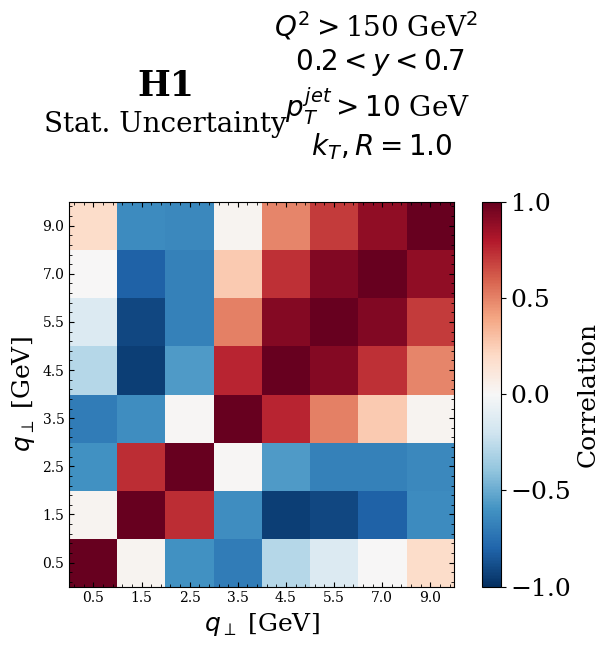

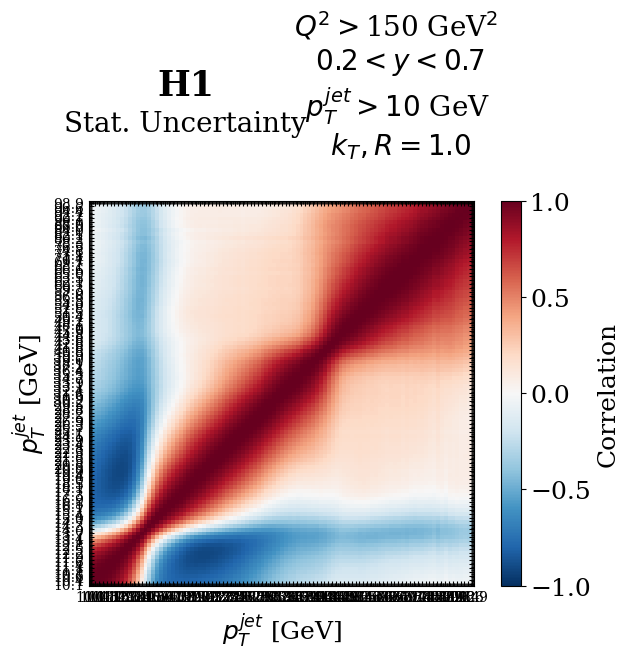

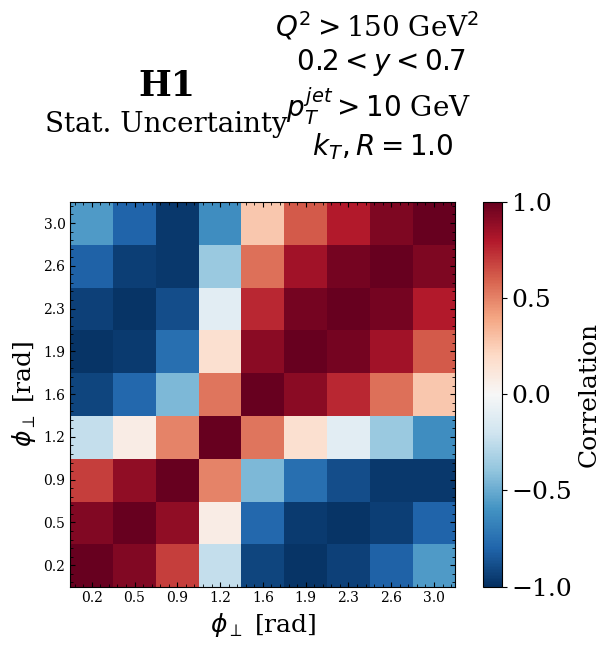

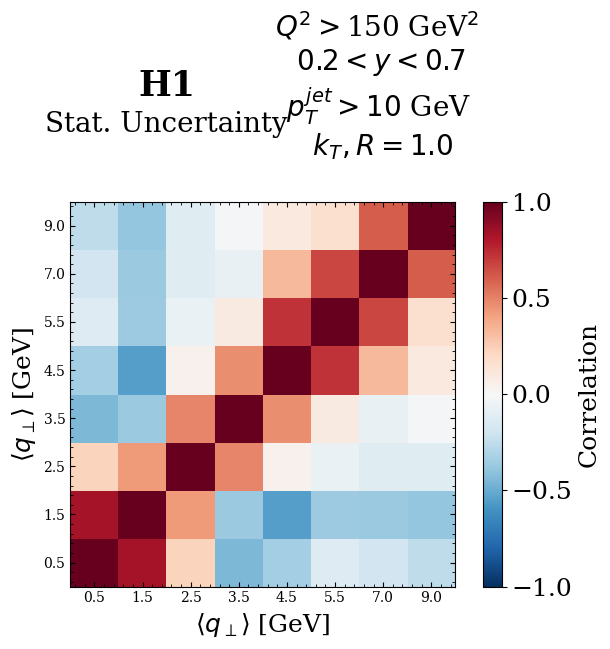

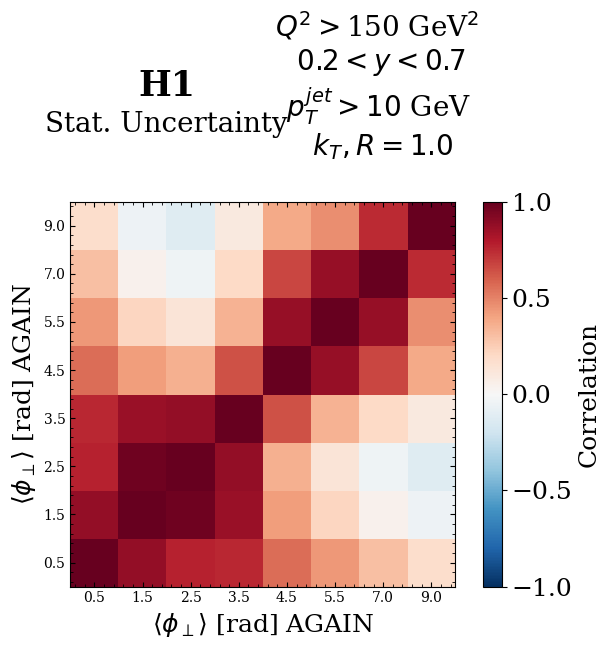

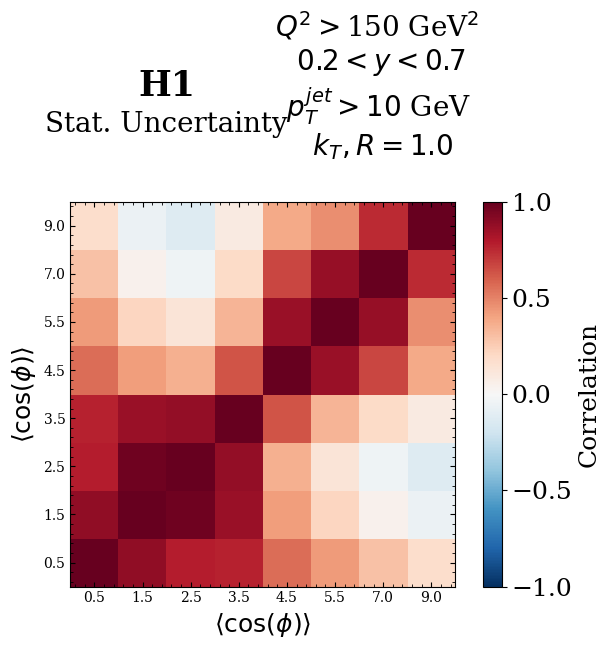

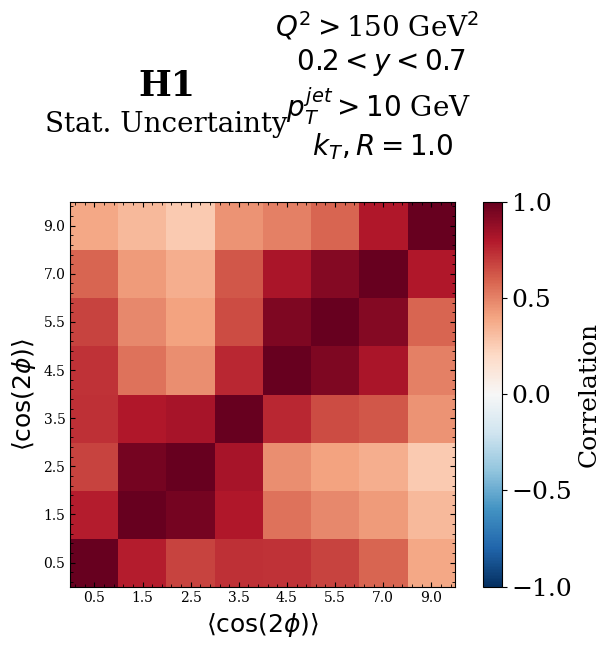

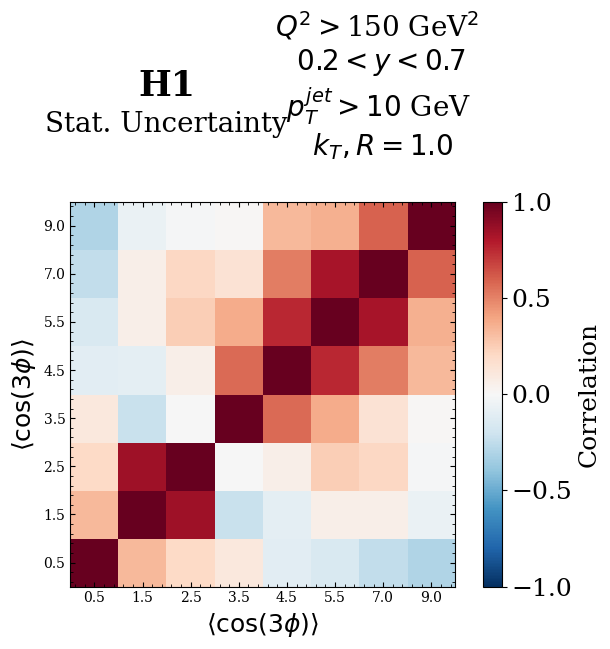

In [25]:
cov_matrices = []
for jj in range(len(theta0_G)+5):
                
    cov_mat = np.zeros([len(bins[jj])-1,len(bins[jj])-1])
    for i in range(len(bins[jj])-1):
            for j in range(len(bins[jj])-1):
                #Stat. uncert
                EX = np.mean(np.array([unfolded_vals[ii,jj] for ii in range(1,N_bootsraps)])[:,i]) #mean over the bootsraps. Array over the bootstraps of a given bin ei, 
                EY = np.mean(np.array([unfolded_vals[ii,jj] for ii in range(1,N_bootsraps)])[:,j]) #mean of bin j. 
                EXY = np.mean(np.array(np.array([unfolded_vals[ii,jj] for ii in range(1,N_bootsraps)])[:,i]*np.array([unfolded_vals[ii,jj] for ii in range(1,N_bootsraps)])[:,j]))
                cov_mat[i,j]+=EXY-EX*EY
            
    cov_mat = np.array(cov_mat)
    cov_matrices.append(cov_mat)
    cor_mat = cov_mat.copy()
    for i in range(len(bins[jj])-1):
        for j in range(len(bins[jj])-1):
            cor_mat[i,j]=cov_mat[i,j]/(cov_mat[i,i]*cov_mat[j,j])**0.5

    fig = plt.figure(figsize=(7, 5)) 
    gs = gridspec.GridSpec(1, 1, height_ratios=[1]) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    #plt.xticks(fontsize=20)
    #plt.yticks(fontsize=20)

    plt.imshow(cor_mat,vmin = -1,vmax = 1,origin='lower',cmap="RdBu_r")
    cbar = plt.colorbar()
    cbar.ax.set_ylabel('Correlation')
    
    plt.text(0.25, 1.3,'H1',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=25, fontweight='bold')
    plt.text(0.25, 1.2,'Stat. Uncertainty',
                  horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)
    plt.text(0.8, 1.3,'$Q^{2}>$150 GeV$^{2}$ \n $0.2<y<0.7$ \n $p_{T}^{jet}>10$ GeV  \n $k_{T}, R=1.0$',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax0.transAxes, fontsize=20)   

    plt.ylabel(symbol[mylabels[jj]])
    plt.xlabel(symbol[mylabels[jj]])
    mylabs = [""]
    if (j<2):
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.0f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    else:
        for i in range(len(bins[jj])-1):
            mylabs+=["%0.1f" % (0.5*(bins[jj][i]+bins[jj][i+1]))]
    ax0.set_xticklabels(mylabs,fontsize=10)
    ax0.set_yticklabels(mylabs,fontsize=10)
    ax0.xaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
    ax0.yaxis.set_major_locator(plt.MaxNLocator(len(bins[jj])))
        
    #fig.savefig('figures/CorStatMat_%s.pdf'%mylabels[jj],bbox_inches='tight')
    fig.savefig("CovMat_lastTwoCombined_Bins_Obs"+str(jj)+".pdf")

In [13]:
for c,cov in enumerate(cov_matrices):
    np.save(f"../npy_files/covariance_matrix_{mylabels[c]}.npy", cov)
#np.save("../npy_files/correlation_matrix.npy", cor_mat)

In [14]:
print('cos1')
print(cov_matrices[-3])
print('cos2')
print(cov_matrices[-2])
print('cos3')
print(cov_matrices[-1])

cos1
[[ 1.80526379e-06  3.29058019e-06  4.73579128e-06  5.11677630e-06
   4.07595924e-06  3.70144686e-06  2.92852415e-06  2.72082273e-06]
 [ 3.29058019e-06  7.60324661e-06  1.20547986e-05  1.17976186e-05
   6.30858212e-06  3.77905551e-06  8.09673988e-07 -1.77849895e-06]
 [ 4.73579128e-06  1.20547986e-05  2.02803473e-05  1.96037978e-05
   8.72566796e-06  3.73696231e-06 -1.43486518e-06 -6.68593279e-06]
 [ 5.11677630e-06  1.17976186e-05  1.96037978e-05  2.45105153e-05
   1.70145540e-05  1.09087668e-05  6.92833241e-06  5.08387793e-06]
 [ 4.07595924e-06  6.30858212e-06  8.72566796e-06  1.70145540e-05
   2.95750356e-05  3.05055737e-05  2.68407482e-05  2.37873953e-05]
 [ 3.70144686e-06  3.77905551e-06  3.73696231e-06  1.09087668e-05
   3.05055737e-05  4.18833170e-05  4.15345845e-05  3.46817593e-05]
 [ 2.92852415e-06  8.09673988e-07 -1.43486518e-06  6.92833241e-06
   2.68407482e-05  4.15345845e-05  5.44269912e-05  6.31477394e-05]
 [ 2.72082273e-06 -1.77849895e-06 -6.68593279e-06  5.08387793e-0

In [15]:
#print(np.shape(cov_matrices))
print(len(cov_matrices))

8


In [16]:
print(np.mean(cov_matrices[0]))
print(np.mean(cov_matrices[3]))

5.701726881042411e-10
1.354908555658077e-06
